In [1]:
import importlib
import theano.tensor as T
import sys, os
sys.path.append("/home/bl3/PycharmProjects/GeMpy/GeMpy")
sys.path.append("/home/bl3/PycharmProjects/GeMpy/pygeomod/pygeomod")
sys.path.append("/home/miguel/PycharmProjects/GeMpy/GeMpy")
import GeoMig
#import geogrid
#importlib.reload(GeoMig)
importlib.reload(GeoMig)
import pandas as pn

import numpy as np

os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
np.set_printoptions(precision = 4, linewidth= 300, suppress =  True)
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

In [4]:
T.jacobian?

In [2]:
# Setting extend, grid and compile
# Setting the extent
test = GeoMig.Interpolator(0,10,0,10,0,10,
                                range_var = np.float32(17),
                               u_grade = 3) # Range used in geomodeller

# Setting resolution of the grid
test.set_resolutions(40,40,60)
test.create_regular_grid_3D()

# Compiling
test.theano_compilation_3D()
#test.theano_set_3D_nugget_degree0()

/home/bl3/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: DeprecationWarning: stack(*tensors) interface is deprecated, use stack(tensors, axis=0) instead.
/home/bl3/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: DeprecationWarning: stack(*tensors) interface is deprecated, use stack(tensors, axis=0) instead.
/home/bl3/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: DeprecationWarning: stack(*tensors) interface is deprecated, use stack(tensors, axis=0) instead.
/home/bl3/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: DeprecationWarning: stack(*tensors) interface is deprecated, use stack(tensors, axis=0) instead.


TypeError: cost must be a scalar.

In [3]:
layer_1 = np.array([[0.5,4,7], [2,4,6], [4,4,7], [5,4,5], [8,4,7], [7,4,8], [1,5,7]])#-np.array([5,5,4]))/8+0.5
layer_2 = np.array([[3,5,5], [6,5,4]])
layer_3 = np.array([[1,5,1],[1,5,2],[6,5,3]])#- np.array([5,5,4]))/8+0.5

dip_pos_1 = np.array([5,5,7])#- np.array([5,5,4]))/8+0.5
dip_pos_2 = np.array([7.,5,2])
dip_pos_3 = np.array([8,4,5])
dip_angle_1 = float(15)
dip_angle_2 = float(230)


layers = np.asarray([layer_1,layer_2])#,np.array([[2,5,11],[3,1,2],[6,2,1]])])
test.layers = np.asarray([layer_1,layer_2])
dips = np.asarray([dip_pos_1, dip_pos_2])#, dip_pos_3])
dips_angles = np.asarray([dip_angle_1, dip_angle_2], dtype="float64")
azimuths = np.asarray([90,90], dtype="float64")
polarity = np.asarray([1,1], dtype="float64")
#print (dips_angles)
np.append(np.tile("Layer_1", len(layer_1)), np.tile("Layer_2", len(layer_2)))
np.append(np.tile("Layer_1", len(dip_pos_1)), np.tile("Layer_2", len(dip_pos_2)))

array(['Layer_1', 'Layer_1', 'Layer_1', 'Layer_2', 'Layer_2', 'Layer_2'], 
      dtype='<U7')

In [4]:
test.Interfaces = pn.DataFrame(data = {"X" :np.append(layer_1[:, 0],layer_2[:,0]),
                                      "Y" :np.append(layer_1[:, 1],layer_2[:,1]),
                                      "Z" :np.append(layer_1[:, 2],layer_2[:,2]),
"formation" : np.append(np.tile("Layer_1", len(layer_1)), np.tile("Layer_2", len(layer_2)))})
test.Foliations =   pn.DataFrame(data = {"X" :np.append(dip_pos_1[0],dip_pos_2[0]),
                                          "Y" :np.append(dip_pos_1[ 1],dip_pos_2[1]),
                                          "Z" :np.append(dip_pos_1[ 2],dip_pos_2[2]),
                                         "azimuth" : azimuths,
                                         "dip" : dips_angles,
                                         "polarity" : polarity,
"formation" : ["Layer_1", "Layer_2"]})
test.Foliations, test.Interfaces
test.formations = test.Interfaces["formation"].unique()
test.set_series()
test.Interfaces

,X,Y,Z,formation
0,0.5,4.0,7.0,Layer_1
1,2.0,4.0,6.0,Layer_1
2,4.0,4.0,7.0,Layer_1
3,5.0,4.0,5.0,Layer_1
4,8.0,4.0,7.0,Layer_1
5,7.0,4.0,8.0,Layer_1
6,1.0,5.0,7.0,Layer_1
7,3.0,5.0,5.0,Layer_2
8,6.0,5.0,4.0,Layer_2


In [5]:
len(test.grid[:,0])/3

32000.0

The serie formations are Layer_1|Layer_2


<IPython.core.display.Javascript object>


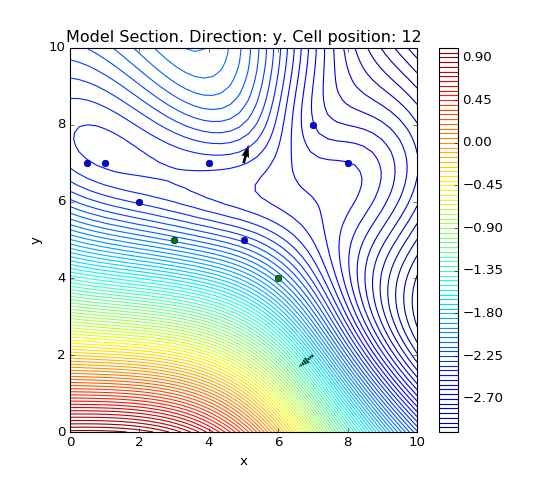

In [6]:
% matplotlib notebook
test.compute_potential_field( verbose=1)
test.plot_potential_field_2D(direction = "y", cell_pos = 12, figsize=(7,6), contour_lines = 100)

In [7]:

# Reset the block
test.block.set_value(np.zeros_like(test.grid[:,0]))

# Compute the block
test.compute_block_model([0], verbose = 0)

[1 2]
[1 1 1 ..., 1 1 1] 0
The serie formations are Layer_1|Layer_2
The formations are: 
Layers       X    Y    Z formation
0  0.5  4.0  7.0   Layer_1
1  2.0  4.0  6.0   Layer_1
2  4.0  4.0  7.0   Layer_1
3  5.0  4.0  5.0   Layer_1
4  8.0  4.0  7.0   Layer_1
5  7.0  4.0  8.0   Layer_1
6  1.0  5.0  7.0   Layer_1
7  3.0  5.0  5.0   Layer_2
8  6.0  5.0  4.0   Layer_2  
 Foliations       X    Y    Z  azimuth    dip formation  polarity
0  5.0  5.0  7.0     90.0   15.0   Layer_1       1.0
1  7.0  5.0  2.0     90.0  230.0   Layer_2       1.0


KeyboardInterrupt: 

<IPython.core.display.Javascript object>


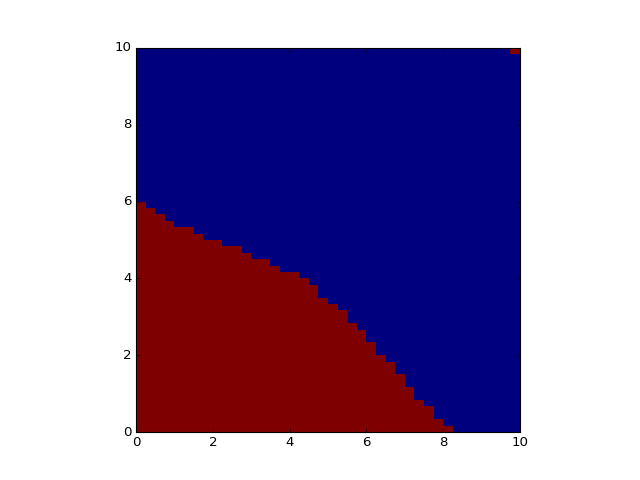

In [10]:
%matplotlib qt4
sandstone = test
plot_block =  sandstone.block.get_value().reshape(40,40,60)
plt.imshow(plot_block[:,13,:].T, origin = "bottom", aspect = "equal",
           extent = (sandstone.xmin, sandstone.xmax, sandstone.zmin, sandstone.zmax), interpolation = "none")

In [3]:
rest = np.vstack((i[1:] for i in layers))
ref = np.vstack((np.tile(i[0],(np.shape(i)[0]-1,1)) for i in layers))
dips_angles.dtype
rest = rest.astype("float64")
ref = ref.astype("float64")

test.azimuths = azimuths
test.dips_angles = dips_angles
test.polarity = polarity
test.dips = dips.astype("float32")
test.azimuths = azimuths
test.dips_angles = dips_angles
test.polarity = polarity
test.dips = dips.astype("float32")
dips_angles = dips_angles.astype("float32")
type(dips_angles)
#test.G_x,test.G_y,test.G_z = test.interpolate(test.dips,dips_angles,
#                                              azimuths,polarity, rest, ref)[-3:]
rest, ref;

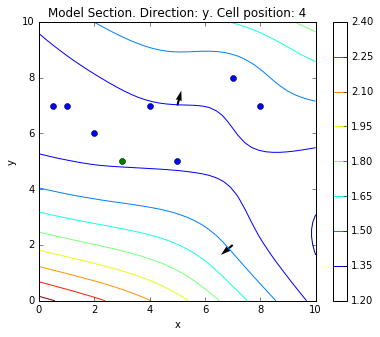

In [4]:
par2 = 1/(7.5**2)
w = 1/7.5
test.potential_field = test.interpolate(dips,dips_angles,azimuths,polarity, rest, ref,
par2, w)[0].reshape(40,10,40)
test.potential_field = np.swapaxes(test.potential_field,0,1)

test.azimuths = azimuths
test.dips_angles = dips_angles
test.polarity = polarity
test.dips = dips.astype("float32")
test.calculate_gradient()
test.plot_potential_field_2D(direction="y", cell_pos = 4, figsize = (6.2,5), colorbar = True)

# Plotting development

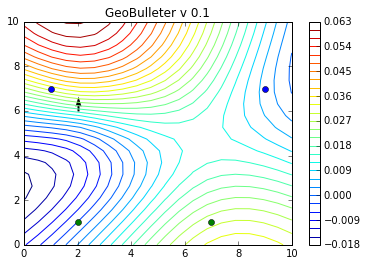

In [30]:
plot_this_crap("y")

In [121]:
"""Export model to VTK

Export the geology blocks to VTK for visualisation of the entire 3-D model in an
external VTK viewer, e.g. Paraview.

..Note:: Requires pyevtk, available for free on: https://github.com/firedrakeproject/firedrake/tree/master/python/evtk

**Optional keywords**:
    - *vtk_filename* = string : filename of VTK file (default: output_name)
    - *data* = np.array : data array to export to VKT (default: entire block model)
"""
vtk_filename = "noddyFunct2"

extent_x = 10
extent_y = 10
extent_z = 10

delx = 0.2
dely = 0.2
delz = 0.2
from pyevtk.hl import gridToVTK
# Coordinates
x = np.arange(0, extent_x + 0.1*delx, delx, dtype='float64')
y = np.arange(0, extent_y + 0.1*dely, dely, dtype='float64')
z = np.arange(0, extent_z + 0.1*delz, delz, dtype='float64')

# self.block = np.swapaxes(self.block, 0, 2)


gridToVTK(vtk_filename, x, y, z, cellData = {"geology" : sol})

ImportError: No module named 'pyevtk'

In [23]:
sys.path.append("/home/bl3/anaconda3/lib/python3.5/site-packages/PyEVTK-1.0.0-py3.5.egg_FILES/pyevtk")
nx = 50
ny = 50
nz = 50

xmin = 1
ymin = 1
zmin = 1
grid =  sol
var_name = "Geology"
#from evtk.hl import gridToVTK
import pyevtk
from pyevtk.hl import gridToVTK

# define coordinates
x = np.zeros(nx + 1)
y = np.zeros(ny + 1)
z = np.zeros(nz + 1)
x[1:] = np.cumsum(delx)
y[1:] = np.cumsum(dely)
z[1:] = np.cumsum(delz)



# plot in coordinates
x += xmin
y += ymin
z += zmin

print (len(x), x)
gridToVTK("GeoMigueller", x, y, z,
          cellData = {var_name: grid})

51 [ 1.   1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2
  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2]


'/home/bl3/PycharmProjects/GeMpy/GeoMigueller.vtr'

# Performance
## CPU

In [6]:
%%timeit
test.interpolate(dips,dips_angles,azimuths,polarity, rest, ref,
par2, w);

100 loops, best of 3: 6.41 ms per loop


In [7]:
test.interpolate.profile.summary()

Function profiling
  Message: /home/miguel/PycharmProjects/GeMpy/GeMpy/GeoMig.py:477
  Time in 412 calls to Function.__call__: 2.742617e+00s
  Time in Function.fn.__call__: 2.696156e+00s (98.306%)
  Time in thunks: 2.541325e+00s (92.661%)
  Total compile time: 1.843985e+01s
    Number of Apply nodes: 254
    Theano Optimizer time: 2.322626e+00s
       Theano validate time: 1.088021e-01s
    Theano Linker time (includes C, CUDA code generation/compiling): 1.604251e+01s
       Import time 1.168010e-01s

Time in all call to theano.grad() 0.000000e+00s
Time since theano import 61.358s
Class
---
<% time> <sum %> <apply time> <time per call> <type> <#call> <#apply> <Class name>
  68.9%    68.9%       1.751s       6.25e-05s     C    28016      68   theano.tensor.elemwise.Elemwise
  11.1%    80.0%       0.282s       6.85e-05s     C     4120      10   theano.tensor.blas.Dot22Scalar
   9.7%    89.7%       0.246s       5.43e-05s     C     4532      11   theano.tensor.basic.Alloc
   4.9%    94.6% 

## GPU

In [54]:
%%timeit
test.interpolate(dips,dips_angles,azimuths,polarity, rest, ref,
par2, w);

100 loops, best of 3: 8.83 ms per loop


In [55]:
test.interpolate.profile.summary()

Function profiling
  Message: /home/miguel/PycharmProjects/GeMpy/GeMpy/GeoMig.py:477
  Time in 412 calls to Function.__call__: 3.664509e+00s
  Time in Function.fn.__call__: 3.621449e+00s (98.825%)
  Time in thunks: 3.093245e+00s (84.411%)
  Total compile time: 2.934427e+00s
    Number of Apply nodes: 291
    Theano Optimizer time: 2.653788e+00s
       Theano validate time: 2.586505e-01s
    Theano Linker time (includes C, CUDA code generation/compiling): 1.999319e-01s
       Import time 0.000000e+00s

Time in all call to theano.grad() 0.000000e+00s
Time since theano import 1682.560s
Class
---
<% time> <sum %> <apply time> <time per call> <type> <#call> <#apply> <Class name>
  51.1%    51.1%       1.582s       1.07e-04s     C    14832      36   theano.tensor.elemwise.Elemwise
   9.2%    60.3%       0.284s       6.89e-05s     C     4120      10   theano.sandbox.cuda.basic_ops.GpuAlloc
   8.9%    69.2%       0.275s       3.71e-05s     C     7416      18   theano.sandbox.cuda.basic_ops.Hos